
# **Principal Component Analysis**





In [1]:
import numpy as np
import pandas as pd

np.random.seed(23) 

mu_vec1 = np.array([0,0,0])
cov_mat1 = np.array([[1,0,0],[0,1,0],[0,0,1]])
class1_sample = np.random.multivariate_normal(mu_vec1, cov_mat1, 20)

df = pd.DataFrame(class1_sample,columns=['feature1','feature2','feature3'])
df['target'] = 1

mu_vec2 = np.array([1,1,1])
cov_mat2 = np.array([[1,0,0],[0,1,0],[0,0,1]])
class2_sample = np.random.multivariate_normal(mu_vec2, cov_mat2, 20)

df1 = pd.DataFrame(class2_sample,columns=['feature1','feature2','feature3'])

df1['target'] = 0

df = df.append(df1,ignore_index=True)

df = df.sample(40)


In [2]:
df.head()


,feature1,feature2,feature3,target
2,-0.367548,-1.137460,-1.322148,1
34,0.177061,-0.598109,1.226512,0
14,0.420623,0.411620,-0.071324,1
11,1.968435,-0.547788,-0.679418,1
12,-2.506230,0.146960,0.606195,1


In [3]:
# Step 1 - Apply standard scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

df.iloc[:,0:3] = scaler.fit_transform(df.iloc[:,0:3])
print(df.iloc[:,0:3])

    feature1  feature2  feature3
2  -0.700809 -1.525586 -1.749156
34 -0.224481 -1.010757  0.491251
14 -0.011456 -0.046935 -0.649616
11  1.342296 -0.962723 -1.184163
12 -2.571350 -0.299561 -0.054040
29  0.867118  0.935791 -0.426437
31  1.566196 -0.219914  0.461019
4  -0.097477 -0.382241 -1.504166
32 -1.011917  0.954984 -0.661960
33  2.090049 -0.757570  1.731490
36 -1.594952  0.196574  0.594105
18 -0.669383 -1.998011 -0.042684
0   0.204020 -0.415201 -1.270487
5  -1.262661 -0.018187  0.405425
39 -0.042731  0.823531 -0.677631
22  1.087278  3.557281 -0.657739
8  -0.168466 -1.349045 -0.706704
15 -0.419084  0.553723 -0.669580
19 -1.247471 -0.593851  0.461269
30  0.878271  0.609885  0.349631
25 -0.125050  0.387719  0.276878
21  0.260757  0.054075  1.386215
37 -1.278334  0.640137  1.701464
16 -0.747423 -0.966733 -0.693369
38 -1.047829  1.055444  0.774549
27  1.379576  1.393819  1.991425
26  0.406862 -0.023700  0.134754
23  0.504227  0.932620  1.459332
1   0.450354  0.229931 -1.510875
10  0.8585

In [4]:
# Step 2 - Find Covariance Matrix
covariance_matrix = np.cov([df.iloc[:,0],df.iloc[:,1],df.iloc[:,2]])
print('Covariance Matrix:\n', covariance_matrix)

Covariance Matrix:
 [[1.02564103 0.20478114 0.080118  ]
 [0.20478114 1.02564103 0.19838882]
 [0.080118   0.19838882 1.02564103]]


In [5]:
# Step 3 - Finding EV and EVs
eigen_values, eigen_vectors = np.linalg.eig(covariance_matrix)

In [6]:
eigen_values


array([1.3536065 , 0.94557084, 0.77774573])

In [7]:
eigen_vectors


array([[-0.53875915, -0.69363291,  0.47813384],
       [-0.65608325, -0.01057596, -0.75461442],
       [-0.52848211,  0.72025103,  0.44938304]])

Populating the interactive namespace from numpy and matplotlib


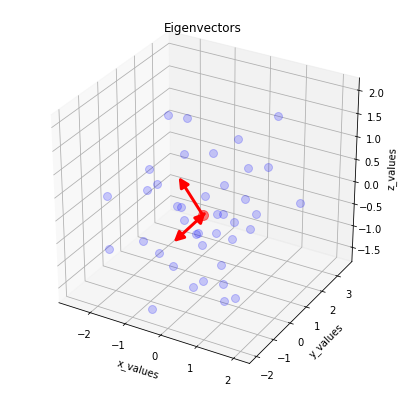

In [8]:
%pylab inline

from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d import proj3d
from matplotlib.patches import FancyArrowPatch


class Arrow3D(FancyArrowPatch):
    def __init__(self, xs, ys, zs, *args, **kwargs):
        FancyArrowPatch.__init__(self, (0,0), (0,0), *args, **kwargs)
        self._verts3d = xs, ys, zs

    def draw(self, renderer):
        xs3d, ys3d, zs3d = self._verts3d
        xs, ys, zs = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)
        self.set_positions((xs[0],ys[0]),(xs[1],ys[1]))
        FancyArrowPatch.draw(self, renderer)

fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(111, projection='3d')

ax.plot(df['feature1'], df['feature2'], df['feature3'], 'o', markersize=8, color='blue', alpha=0.2)
ax.plot([df['feature1'].mean()], [df['feature2'].mean()], [df['feature3'].mean()], 'o', markersize=10, color='red', alpha=0.5)
for v in eigen_vectors.T:
    a = Arrow3D([df['feature1'].mean(), v[0]], [df['feature2'].mean(), v[1]], [df['feature3'].mean(), v[2]], mutation_scale=20, lw=3, arrowstyle="-|>", color="r")
    ax.add_artist(a)
ax.set_xlabel('x_values')
ax.set_ylabel('y_values')
ax.set_zlabel('z_values')

plt.title('Eigenvectors')

plt.show()

In [9]:
pc = eigen_vectors[0:2]
pc

array([[-0.53875915, -0.69363291,  0.47813384],
       [-0.65608325, -0.01057596, -0.75461442]])

In [10]:
transformed_df = np.dot(df.iloc[:,0:3],pc.T)
# 40,3 - 3,2
new_df = pd.DataFrame(transformed_df,columns=['PC1','PC2'])
new_df['target'] = df['target'].values
new_df.head()

,PC1,PC2,target
0,0.599433,1.795862,1
1,1.056919,-0.212737,0
2,-0.271876,0.498222,1
3,-0.621586,0.023110,1
4,1.567286,1.730967,1


In [11]:
import plotly.express as px

new_df['target'] = new_df['target'].astype('str')
fig = px.scatter(x=new_df['PC1'],
                 y=new_df['PC2'],
                 color=new_df['target'],
                 color_discrete_sequence=px.colors.qualitative.G10
                )

fig.update_traces(marker=dict(size=12,
                              line=dict(width=2,
                                        color='DarkSlateGrey')),
                  selector=dict(mode='markers'))
fig.show()

In [12]:
import numpy as np
import pandas as pd
import pprint
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
%matplotlib inline
%precision 3
np.set_printoptions(precision=3)
import pylab as pl

In [13]:

x1 = np.arange(0,10)
y1 = np.arange(10,0,-1)

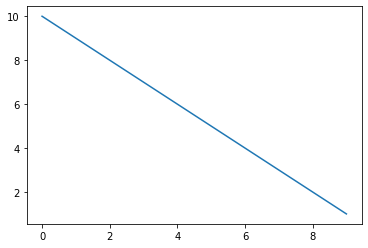

In [14]:
plt.plot(x1,y1)


In [15]:
np.cov([x1,y1])


array([[ 9.167, -9.167],
       [-9.167,  9.167]])

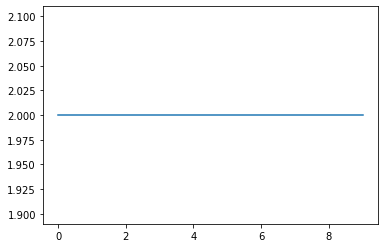

In [16]:
x2 = np.arange(0,10)
y2 = np.array([2]*10)
plt.plot(x2,y2) 

In [17]:
cov_mat = np.cov([x2,y2])
cov_mat

array([[9.167, 0.   ],
       [0.   , 0.   ]])

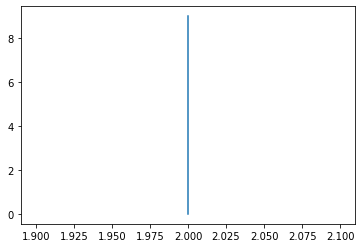

In [18]:
x3 = np.array([2]*10)
y3 = np.arange(0,10)
plt.plot(x3,y3)

In [19]:
np.cov([x3,y3])


array([[0.   , 0.   ],
       [0.   , 9.167]])

In [20]:
iris = load_iris()


In [21]:
iris_df = pd.DataFrame(iris.data,columns=[iris.feature_names])
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [22]:
X = iris.data


In [23]:
X.shape


(150, 4)

In [24]:

from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(X)
print(X_std[0:5])
print("The shape of Feature Matrix is -",(X_std.shape))

[[-0.901  1.019 -1.34  -1.315]
 [-1.143 -0.132 -1.34  -1.315]
 [-1.385  0.328 -1.397 -1.315]
 [-1.507  0.098 -1.283 -1.315]
 [-1.022  1.249 -1.34  -1.315]]
The shape of Feature Matrix is - (150, 4)


In [25]:
X_covariance_matrix = np.cov(X_std.T)


In [26]:
X_covariance_matrix


array([[ 1.007, -0.118,  0.878,  0.823],
       [-0.118,  1.007, -0.431, -0.369],
       [ 0.878, -0.431,  1.007,  0.969],
       [ 0.823, -0.369,  0.969,  1.007]])

In [27]:
eig_vals, eig_vecs = np.linalg.eig(X_covariance_matrix)

print('Eigenvectors \n%s' %eig_vecs)
print('\nEigenvalues \n%s' %eig_vals)

Eigenvectors 
[[ 0.521 -0.377 -0.72   0.261]
 [-0.269 -0.923  0.244 -0.124]
 [ 0.58  -0.024  0.142 -0.801]
 [ 0.565 -0.067  0.634  0.524]]

Eigenvalues 
[2.938 0.92  0.148 0.021]


In [28]:
# Make a list of (eigenvalue, eigenvector) tuples
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eig_pairs.sort(key=lambda x: x[0], reverse=True)

# Visually confirm that the list is correctly sorted by decreasing eigenvalues
print('Eigenvalues in descending order:')
for i in eig_pairs:
    print(i[0])

Eigenvalues in descending order:
2.9380850501999918
0.9201649041624865
0.14774182104494768
0.02085386217646253


In [29]:

tot = sum(eig_vals)
var_exp = [(i / tot)*100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
print ("Variance captured by each component is \n",var_exp)
print(40 * '-')
print ("Cumulative variance captured as we travel each component \n",cum_var_exp)

Variance captured by each component is 
 [72.96244541329987, 22.85076178670177, 3.668921889282871, 0.5178709107154866]
----------------------------------------
Cumulative variance captured as we travel each component 
 [ 72.962  95.813  99.482 100.   ]


In [30]:
print ("All Eigen Values along with Eigen Vectors")
pprint.pprint(eig_pairs)
print(40 * '-')
matrix_w = np.hstack((eig_pairs[0][1].reshape(4,1),
                      eig_pairs[1][1].reshape(4,1)))

print ('Matrix W:\n', matrix_w)

All Eigen Values along with Eigen Vectors
[(2.9380850501999918, array([ 0.521, -0.269,  0.58 ,  0.565])),
 (0.9201649041624865, array([-0.377, -0.923, -0.024, -0.067])),
 (0.14774182104494768, array([-0.72 ,  0.244,  0.142,  0.634])),
 (0.02085386217646253, array([ 0.261, -0.124, -0.801,  0.524]))]
----------------------------------------
Matrix W:
 [[ 0.521 -0.377]
 [-0.269 -0.923]
 [ 0.58  -0.024]
 [ 0.565 -0.067]]


In [31]:
Y = X_std.dot(matrix_w)
print (Y[0:5])

[[-2.265 -0.48 ]
 [-2.081  0.674]
 [-2.364  0.342]
 [-2.299  0.597]
 [-2.39  -0.647]]


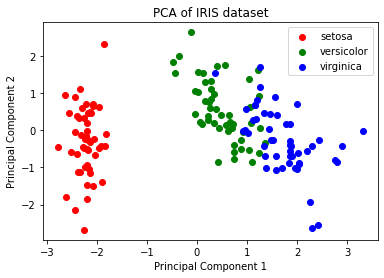

In [32]:
pl.figure()
target_names = iris.target_names
y = iris.target
for c, i, target_name in zip("rgb", [0, 1, 2], target_names):
    pl.scatter(Y[y==i,0], Y[y==i,1], c=c, label=target_name)
pl.xlabel('Principal Component 1')
pl.ylabel('Principal Component 2')
pl.legend()
pl.title('PCA of IRIS dataset')
pl.show()

In [33]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
cancer.keys()


dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [34]:
df = pd.DataFrame(cancer['data'],columns=cancer['feature_names'])
#(['DESCR', 'data', 'feature_names', 'target_names', 'target'])
df.head()


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [35]:
from sklearn.preprocessing import StandardScaler


In [36]:
scaler = StandardScaler()
scaler.fit(df)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [37]:
scaled_data = scaler.transform(df)


In [38]:
from sklearn.decomposition import PCA


In [39]:
pca = PCA(n_components=2)
pca.fit(scaled_data)


PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [40]:
x_pca = pca.transform(scaled_data)


In [41]:
scaled_data.shape


(569, 30)

In [42]:
x_pca.shape


(569, 2)

Text(0, 0.5, 'Second Principal Component')

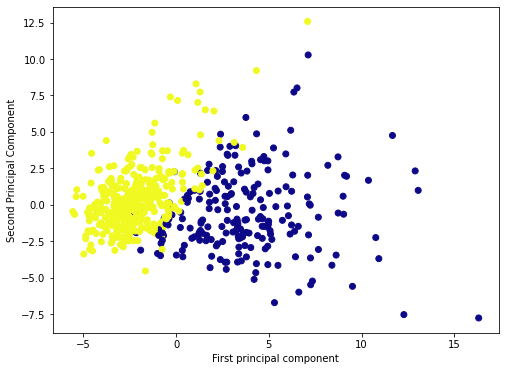

In [43]:
plt.figure(figsize=(8,6))
plt.scatter(x_pca[:,0],x_pca[:,1],c=cancer['target'],cmap='plasma')
plt.xlabel('First principal component')
plt.ylabel('Second Principal Component')

In [44]:
pca.components_


array([[ 0.219,  0.104,  0.228,  0.221,  0.143,  0.239,  0.258,  0.261,
         0.138,  0.064,  0.206,  0.017,  0.211,  0.203,  0.015,  0.17 ,
         0.154,  0.183,  0.042,  0.103,  0.228,  0.104,  0.237,  0.225,
         0.128,  0.21 ,  0.229,  0.251,  0.123,  0.132],
       [-0.234, -0.06 , -0.215, -0.231,  0.186,  0.152,  0.06 , -0.035,
         0.19 ,  0.367, -0.106,  0.09 , -0.089, -0.152,  0.204,  0.233,
         0.197,  0.13 ,  0.184,  0.28 , -0.22 , -0.045, -0.2  , -0.219,
         0.172,  0.144,  0.098, -0.008,  0.142,  0.275]])

In [45]:
df_comp = pd.DataFrame(pca.components_,columns=cancer['feature_names'])


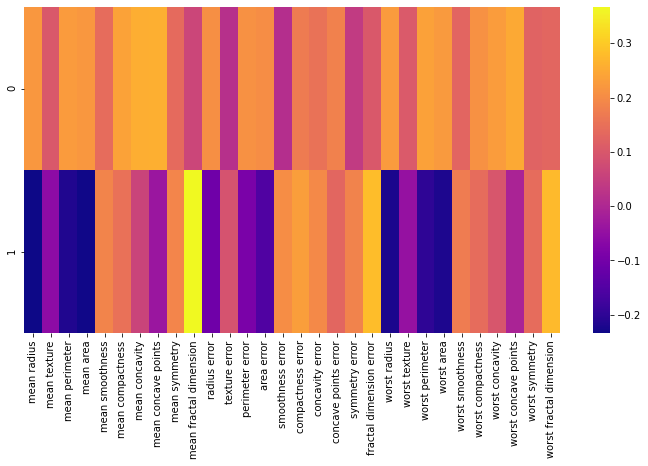

In [46]:
import seaborn as sns

plt.figure(figsize=(12,6))
sns.heatmap(df_comp,cmap='plasma',)

In [47]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [48]:
iris = load_iris()
df = pd.DataFrame(iris['data'],columns=iris['feature_names'])
df.head()
X=df

In [49]:
# Making X two-dimensional
X = X.loc[:, ['sepal length (cm)', 'petal length (cm)']]

# Scaling X to center it at the origin
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), index=X.index, columns=X.columns)
X

,sepal length (cm),petal length (cm)
0,-0.900681,-1.340227
1,-1.143017,-1.340227
2,-1.385353,-1.397064
3,-1.506521,-1.283389
4,-1.021849,-1.340227
...,...,...
145,1.038005,0.819596
146,0.553333,0.705921
147,0.795669,0.819596
148,0.432165,0.933271


In [50]:
# Applying PCA without dimensionality reduction
pca = PCA(n_components=2)
X_pca = pd.DataFrame(pca.fit_transform(X), index=X.index, columns=["PC1", "PC2"])
X_pca

,PC1,PC2
0,-1.584561,-0.310806
1,-1.755918,-0.139448
2,-1.967466,-0.008281
3,-1.972764,0.157778
4,-1.670240,-0.225127
...,...,...
145,1.313522,-0.154439
146,0.890427,0.107896
147,1.142165,0.016919
148,0.965509,0.354335


In [51]:
X_eigenvectors = pd.DataFrame(np.linalg.svd(np.cov(X.T))[0])
X_eigenvectors

,0,1
0,-0.707107,-0.707107
1,-0.707107,0.707107


In [52]:
pca_eigenvectors = pd.DataFrame(np.linalg.svd(np.cov(X_pca.T))[0])
pca_eigenvectors

,0,1
0,-1.000000e+00,-4.793502e-19
1,-4.793502e-19,1.000000e+00


No handles with labels found to put in legend.
No handles with labels found to put in legend.


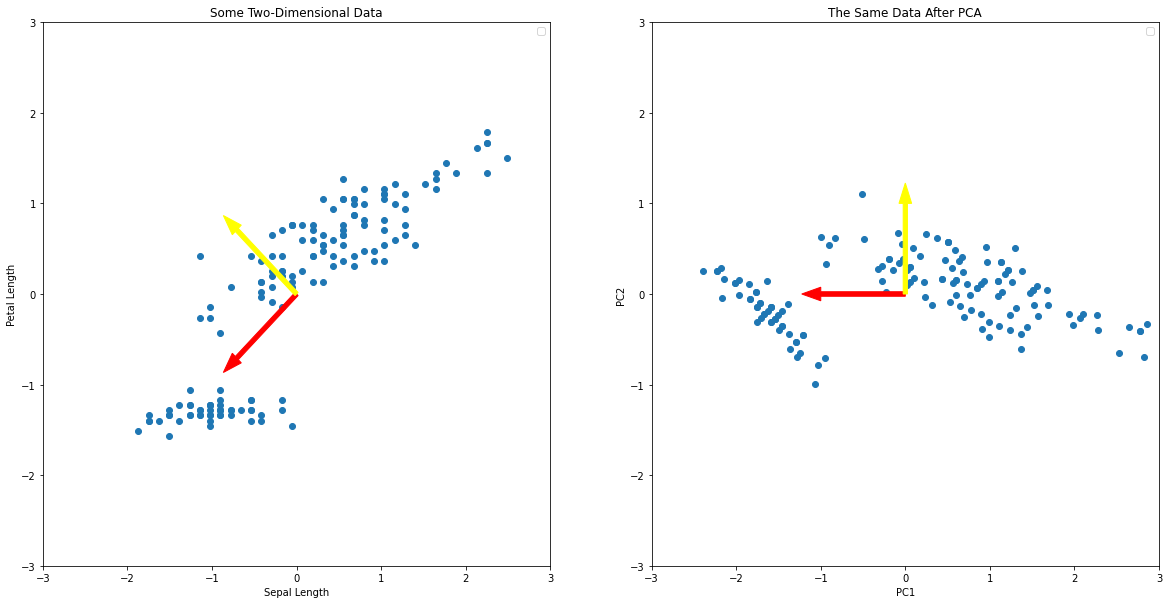

In [53]:
plt.figure(figsize=(20, 10))

plt.subplot(1, 2, 1)
plt.scatter(X['sepal length (cm)'], X['petal length (cm)'])
plt.arrow(
    x=0,
    y=0,
    dx=X_eigenvectors.iloc[0, 0],
    dy=X_eigenvectors.iloc[1, 0],
    width=0.05,
    color='red',
    label="PC1"
)
plt.arrow(
    x=0,
    y=0,
    dx=X_eigenvectors.iloc[0, 1],
    dy=X_eigenvectors.iloc[1, 1],
    width=0.05,
    color='yellow',
    label="PC2"
)
plt.xlim(-3, 3)
plt.ylim(-3, 3)
plt.xlabel("Sepal Length")
plt.ylabel("Petal Length")
plt.title("Some Two-Dimensional Data")
plt.legend()

plt.subplot(1, 2, 2)
plt.scatter(X_pca['PC1'], X_pca['PC2'])
plt.arrow(
    x=0,
    y=0,
    dx=pca_eigenvectors.iloc[0, 0],
    dy=pca_eigenvectors.iloc[1, 0],
    width=0.05,
    color='red',
    label="PC1"
)
plt.arrow(
    x=0,
    y=0,
    dx=pca_eigenvectors.iloc[0, 1],
    dy=pca_eigenvectors.iloc[1, 1],
    width=0.05,
    color='yellow',
    label="PC2"
)
plt.xlim(-3, 3)
plt.ylim(-3, 3)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("The Same Data After PCA")
plt.legend()

plt.show()